# Happiness Assignment

In this assignment, we look at data from the World Happiness Report. We aim to do 3 things during Exploratory Data Analysis (EDA):

1. Understand the data
2. Analyze relationships in variables (Univariable Analysis)
3. Analyze relationships between variables (Bivariable or Multivariable Analysis)

We will utilize numpy, pandas, seaborn, and matplotlib as tools to help us explore this dataset and visualize the relationships we find.

In [2]:
# first, we import the necessary tools to do EDA.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# we read in the excel sheet here
happiness_df = pd.read_excel('DataForTable2.1WHR2023.xls')
happiness_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [4]:
# we can take a look at the column headers here
happiness_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [5]:
# and get a general idea of completeness of data here
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [6]:
# we can use this to get some statistical information on the various features
happiness_df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


To understand what the column headers mean and the range of values that each column can contain, we can refer to the documentation accompanying the dataset from World Happiness Report - Statistical Appendix 1 for Chapter 2 (https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf).

Using the appendix and the above output, we can see that there are some missing values for some of the features that go into calculating the Life Ladder (or Happiness score as commonly referred to). Compared to the available entries, the missing values are few and far in between, with "Perceptions of Corruption" having the most missing values at 116.

We can also understand how data is represented in this dataset with the help of the documentation. The country name is represented as a string, the year is represented as an int, and the rest of the fields are represented as floats. The report contains data from 2005 to 2022, and 'Life Ladder' has a possible range from 0 to 10. 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', and 'Negative affect' all have possible range 0 to 10.  

In [7]:
# we can do the following in order to see the actual countries represented in the report
print("unique countries: ", happiness_df['Country name'].unique())
print("# of unique countries: ", happiness_df['Country name'].nunique())

unique countries:  ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Mada

In [8]:
# we can see how many entries there are per year here
happiness_df.year.value_counts()

2017    147
2011    146
2014    144
2019    143
2015    142
2012    141
2016    141
2018    141
2013    136
2010    124
2021    122
2020    116
2009    114
2022    114
2008    110
2007    102
2006     89
2005     27
Name: year, dtype: int64

## Univariate Analysis

We can take a look at the data for each feature and see what their distribution is like.

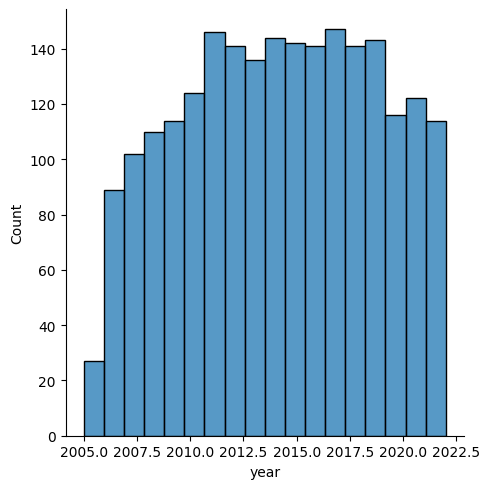

In [12]:
# a plot showing the number of rows per year
sns.displot(happiness_df['year'], bins=18)

The graph above shows that data is most complete between early 2010s to 2020. Very few entries are available in the year 2005, so that is possibly data that we can neglect (depending on our task)

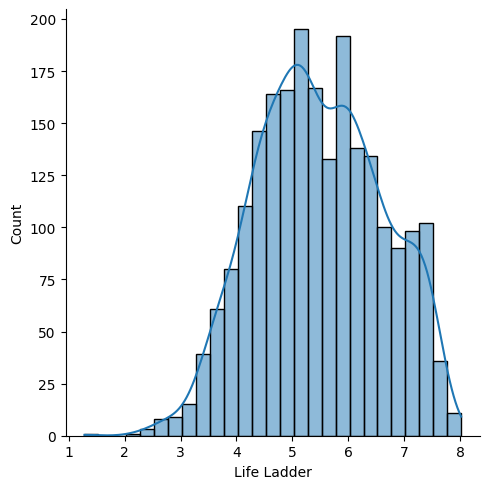

In [10]:
# we can take a look at the distribution of Life Ladder throughout the years
sns.displot(happiness_df['Life Ladder'], kde=True)

Expanding on the above idea, we can plot out each feature and see what their distribution is like.

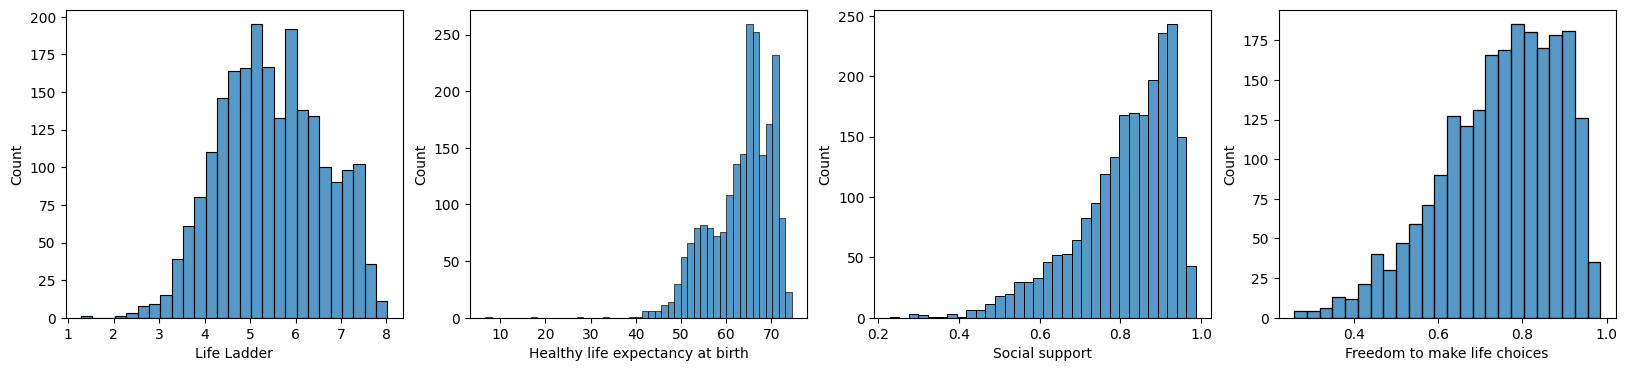

In [14]:
fig, axs = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(happiness_df['Life Ladder'], ax=axs[0])
sns.histplot(happiness_df['Healthy life expectancy at birth'], ax=axs[1])
sns.histplot(happiness_df['Social support'], ax=axs[2])
sns.histplot(happiness_df['Freedom to make life choices'], ax=axs[3])
plt.show()

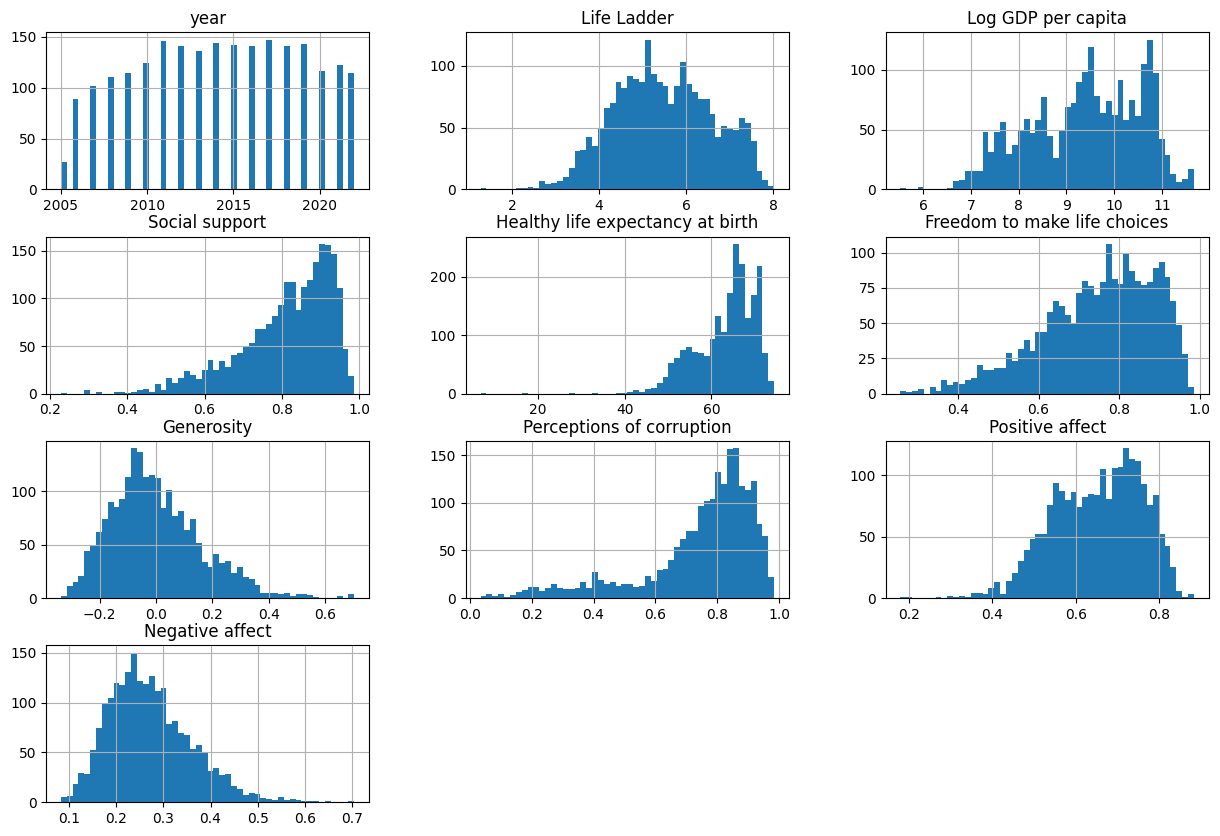

In [21]:
happiness_df.hist(bins=50, figsize=(15,10))
plt.show()

We can see that Life Ladder, Generosity, Positive affect, and Negative affect have distribution similar to normal distribution whereas Social support, Healthy life expectancy at birth, and Perceptions of corruption have a more power law distribution-like curve. We can also see there appears to be some outliers in Healthy life expectancy at birth.

## Bivariate and Multivariate Analysis

We can then also perform Bivariate and Multivariate Analysis to see if there's any correlations between variables.

<AxesSubplot: >

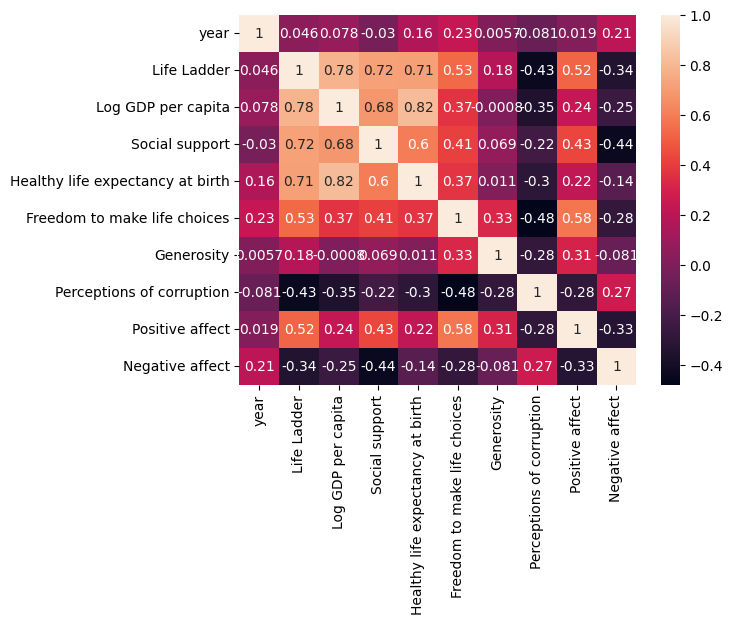

In [15]:
# first let's do a heatmap of all columns
sns.heatmap(happiness_df.drop(['Country name'], axis=1).corr(), annot=True)

From the heatmap, we can see a strong correlation between the following pairs involving Life Ladder (happiness):
- Life Ladder and Log GDP per capita
- Life Ladder and Social support
- Life Ladder and Healthy life expectancy at birth

There is also a relatively strong correlation between the following pairs:
- Life Ladder and Freedome to make life choices
- Life Ladder and Perceptions of corruption
- Life Ladder and Positive affect

Life Ladder and Negative affect also have some correlation.

We can also see that other pairs of variables like Social Support and Log GDP per capita and Healthy life expectancy at birth and Log GDP per capita also exhibit strong correlation.

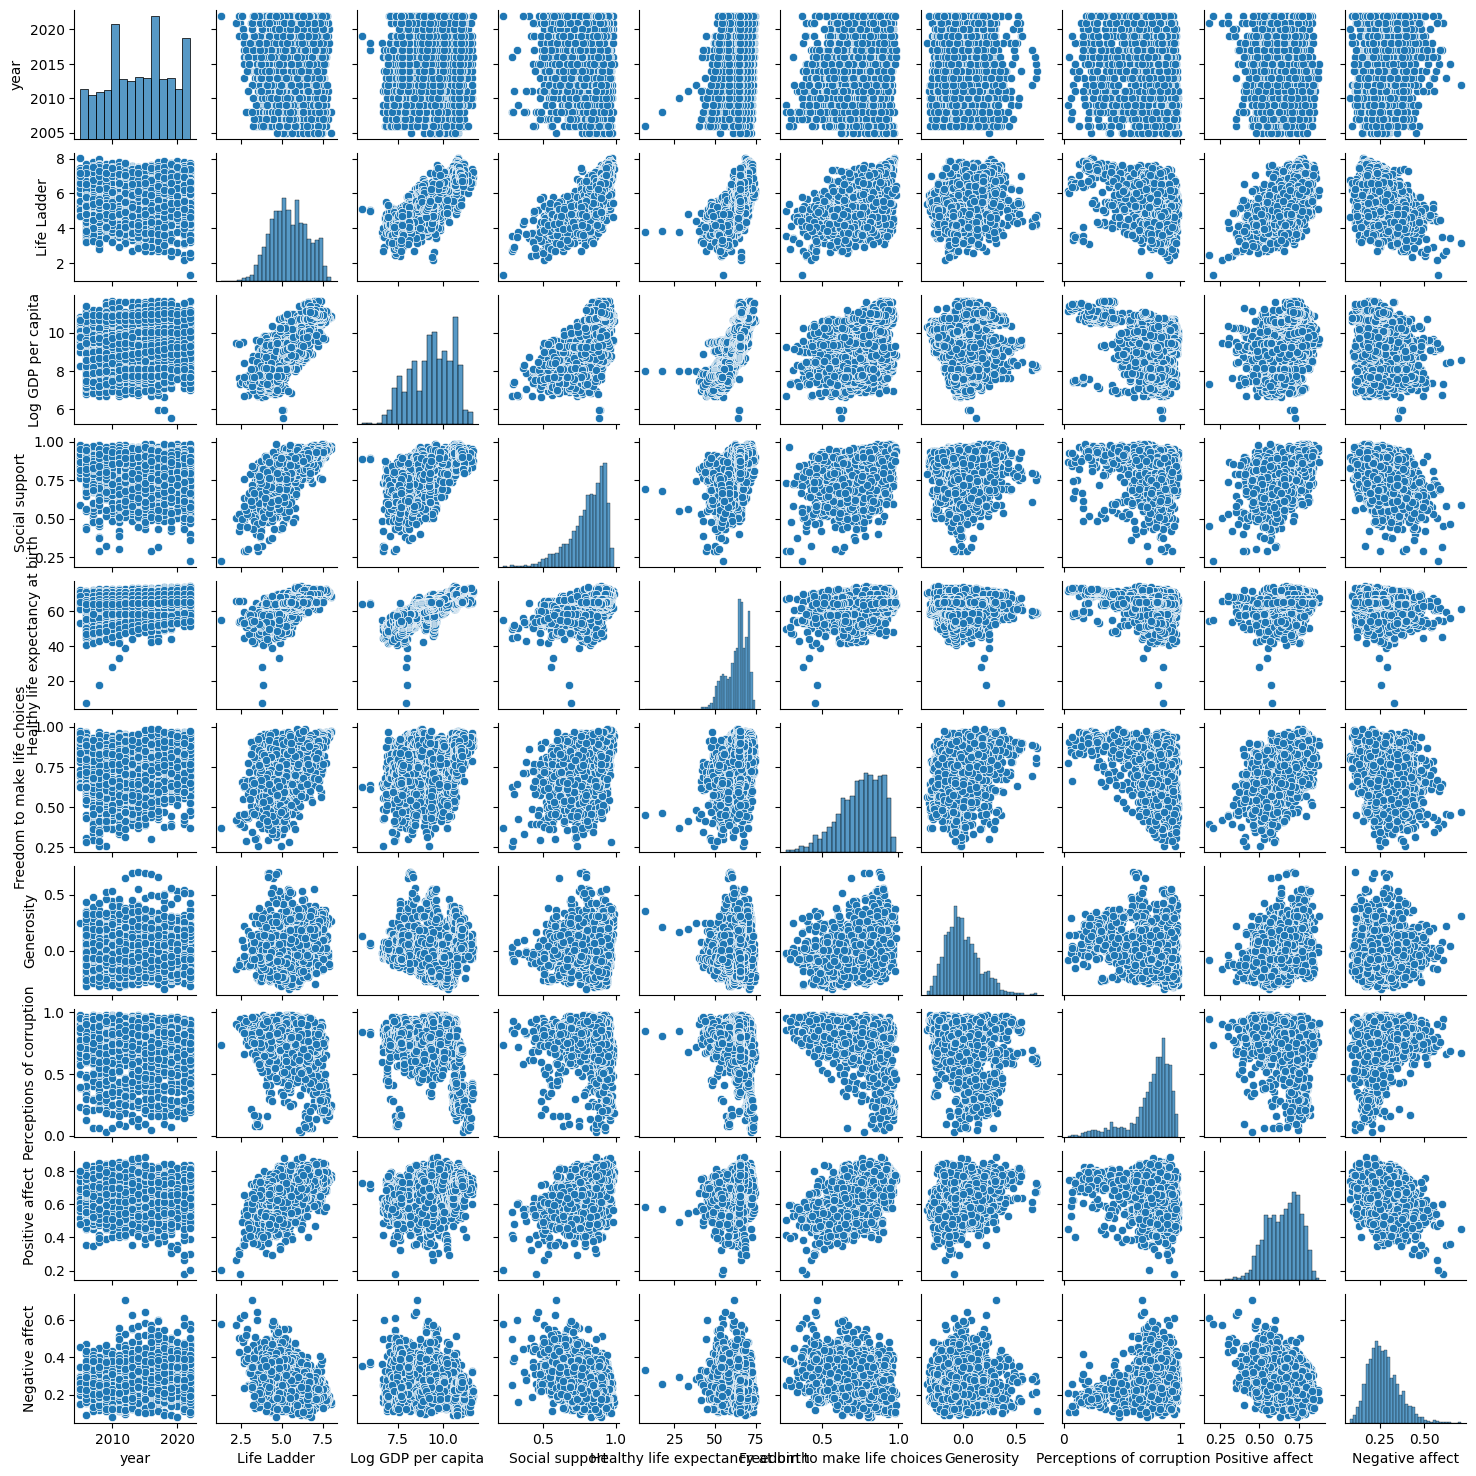

In [20]:
sns.pairplot(happiness_df, height=1.5)

We can take a closer look at plots that look interesting, for example:

<AxesSubplot: xlabel='Life Ladder', ylabel='Log GDP per capita'>

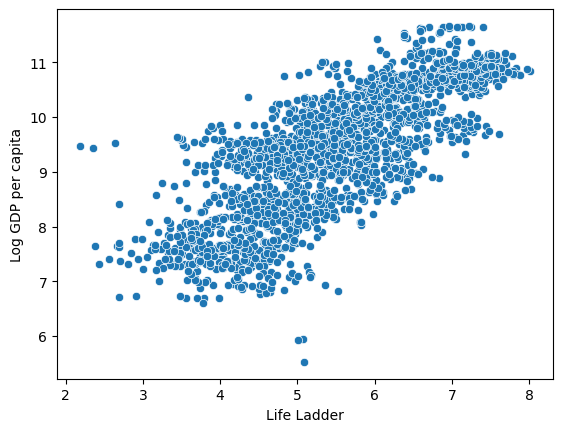

In [21]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Log GDP per capita'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Log GDP per capita'>

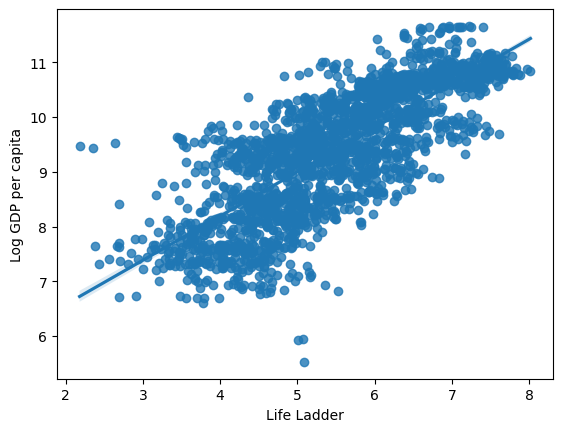

In [42]:
sns.regplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Log GDP per capita'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Social support'>

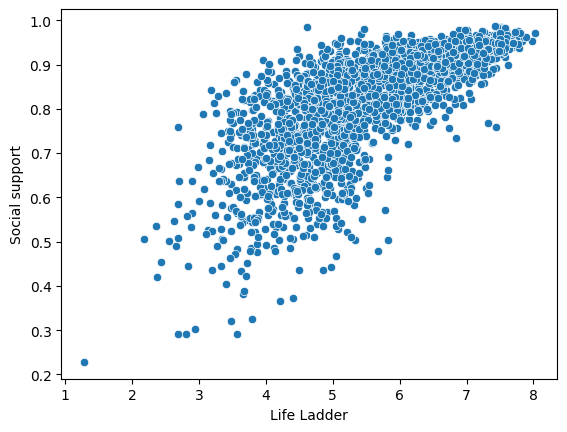

In [34]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Social support'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Healthy life expectancy at birth'>

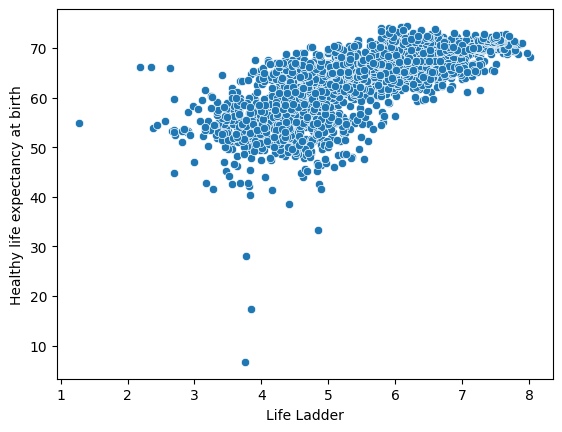

In [35]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Healthy life expectancy at birth'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Freedom to make life choices'>

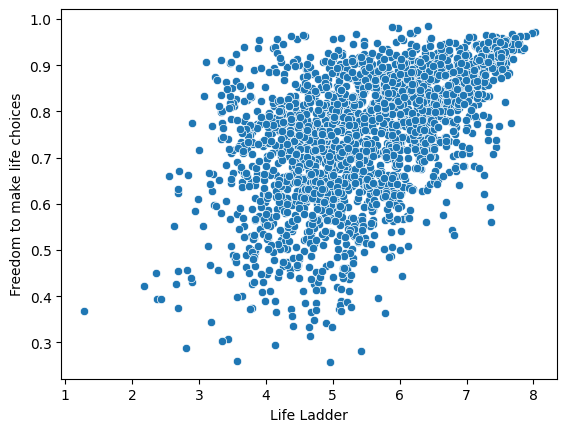

In [36]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Freedom to make life choices'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Perceptions of corruption'>

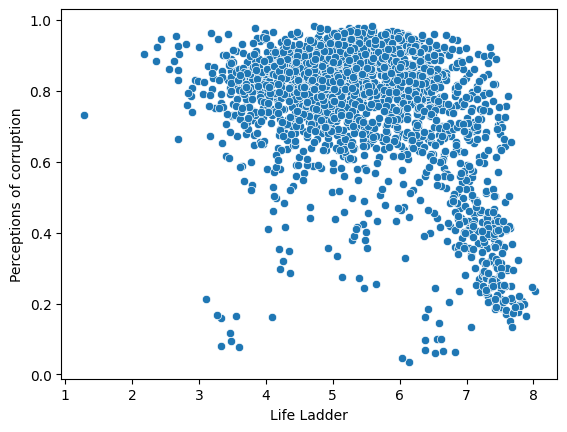

In [37]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Perceptions of corruption'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Positive affect'>

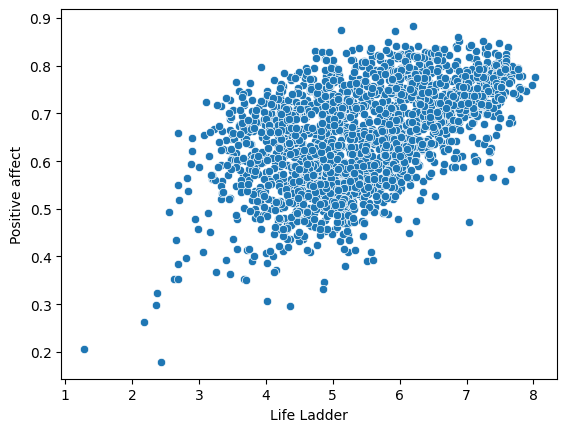

In [38]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Positive affect'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Negative affect'>

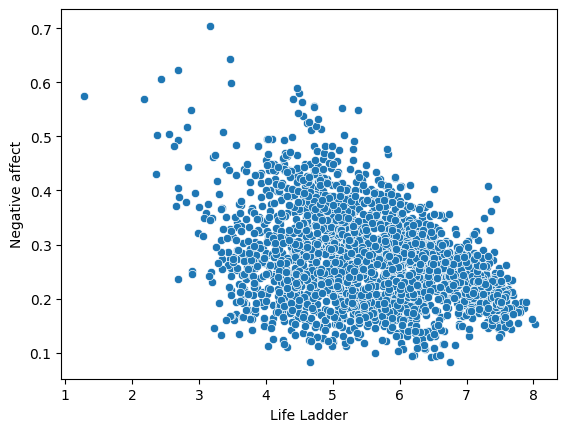

In [39]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Negative affect'])

<AxesSubplot: xlabel='Log GDP per capita', ylabel='Perceptions of corruption'>

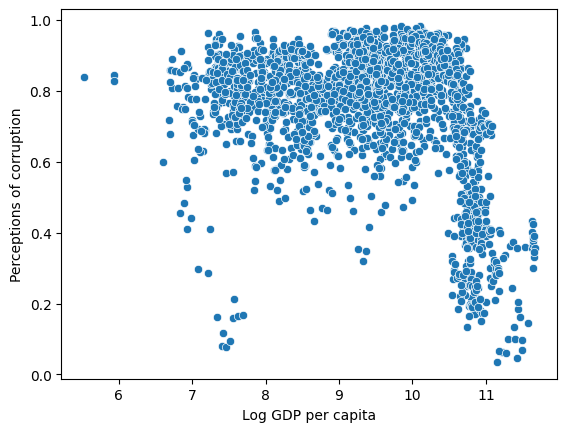

In [40]:
sns.scatterplot(data=happiness_df, x=happiness_df['Log GDP per capita'], y=happiness_df['Perceptions of corruption'])

<AxesSubplot: xlabel='Log GDP per capita', ylabel='Freedom to make life choices'>

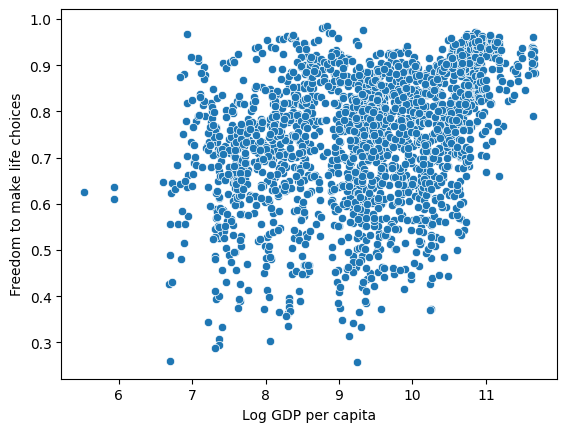

In [41]:
sns.scatterplot(data=happiness_df, x=happiness_df['Log GDP per capita'], y=happiness_df['Freedom to make life choices'])

To help answer questions 2 and 3, we can take split the data into 2 dataframes, 1 containing data from 2013, and 1 containing data from 2022.

In [22]:
happiness_df_2013 = happiness_df.query('year == 2013')
happiness_df_2013

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328
19,Albania,2013,4.550648,9.338146,0.759477,68.440002,0.631830,-0.128825,0.862905,0.540751,0.338379
41,Angola,2013,3.937107,8.999667,0.721591,52.459999,0.409555,-0.105992,0.816375,0.650047,0.370875
50,Argentina,2013,6.582260,10.103327,0.909874,66.660004,0.737250,-0.133839,0.822900,0.766157,0.254205
67,Armenia,2013,4.277191,9.275876,0.723260,65.519997,0.504082,-0.198420,0.899797,0.502904,0.449950
...,...,...,...,...,...,...,...,...,...,...,...
2128,Venezuela,2013,6.552796,9.801931,0.896301,65.180000,0.641965,-0.227712,0.837300,0.812144,0.237609
2145,Vietnam,2013,5.022699,8.889822,0.759477,64.739998,0.919607,-0.045563,0.771246,0.688878,0.165225
2160,Yemen,2013,4.217679,8.166425,0.693905,58.480000,0.542547,-0.175701,0.885197,0.478329,0.265685
2173,Zambia,2013,5.243996,8.110991,0.761312,51.380001,0.769912,-0.104995,0.732268,0.726740,0.307960


In [23]:
happiness_df_2013[['Country name','Life Ladder']].sort_values('Life Ladder')

,Country name,Life Ladder
1883,Syria,2.687553
279,Burkina Faso,3.325950
1641,Rwanda,3.466388
185,Benin,3.479413
356,Chad,3.507663
...,...,...
628,Finland,7.444636
97,Austria,7.498803
823,Iceland,7.501394
512,Denmark,7.588607


In [24]:
happiness_df_2013.loc[happiness_df_2013['Life Ladder'] == max(happiness_df_2013['Life Ladder'])]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
334,Canada,2013,7.593794,10.751601,0.936239,70.980003,0.916014,0.311748,0.406236,0.800634,0.26285


In [25]:
happiness_df_2013.loc[happiness_df_2013['Life Ladder'] == min(happiness_df_2013['Life Ladder'])]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1883,Syria,2013,2.687553,8.418935,0.58545,59.82,0.454883,0.221555,0.663431,0.353619,0.62223


In [26]:
happiness_df_2022 = happiness_df.query('year == 2022')
happiness_df_2022

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512
28,Albania,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826
59,Argentina,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279
75,Armenia,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468
91,Australia,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920
...,...,...,...,...,...,...,...,...,...,...,...
2104,Uruguay,2022,6.670853,10.084121,0.904825,67.500000,0.877969,-0.051668,0.631337,0.774694,0.267485
2120,Uzbekistan,2022,6.016239,8.989866,0.878923,65.599998,0.959019,0.308951,0.615844,0.741082,0.224580
2137,Venezuela,2022,5.948992,NaN,0.899366,63.875000,0.770417,NaN,0.798016,0.754337,0.292252
2154,Vietnam,2022,6.266509,9.332854,0.878744,65.599998,0.975405,-0.178987,0.703423,0.774236,0.108473


In [28]:
happiness_df_2022[['Country name','Life Ladder']].sort_values('Life Ladder')

,Country name,Life Ladder
13,Afghanistan,1.281271
1117,Lebanon,2.352428
1709,Sierra Leone,2.560430
442,Congo (Kinshasa),3.207197
2198,Zimbabwe,3.296220
...,...,...
1865,Sweden,7.431214
830,Iceland,7.448794
521,Denmark,7.544965
925,Israel,7.662397


In [29]:
happiness_df_2022.loc[happiness_df_2022['Life Ladder'] == max(happiness_df_2022['Life Ladder'])]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
637,Finland,2022,7.728998,10.814193,0.974395,71.224998,0.958609,0.102147,0.190207,0.741323,0.191473


In [30]:
happiness_df_2022.loc[happiness_df_2022['Life Ladder'] == min(happiness_df_2022['Life Ladder'])]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875,0.368377,NaN,0.733198,0.205868,0.575512


In [36]:
happiness_all_time = happiness_df.groupby('Country name').mean().sort_values('Life Ladder')
happiness_all_time

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Afghanistan,2014.642857,3.346632,7.585588,0.484381,52.533928,0.498487,0.059799,0.842778,0.433324,0.364459
South Sudan,2015.500000,3.401875,NaN,0.554719,53.101250,0.493705,NaN,0.749433,0.572469,0.486184
Central African Republic,2012.200000,3.514954,6.894669,0.402559,43.374000,0.680430,0.030658,0.842129,0.539942,0.391497
Burundi,2012.000000,3.548124,6.682296,0.417652,52.008000,0.451014,-0.034613,0.732270,0.570199,0.244124
Rwanda,2013.166667,3.654473,7.427593,0.619421,57.570833,0.868012,0.012766,0.185955,0.692553,0.223807
...,...,...,...,...,...,...,...,...,...,...
Iceland,2016.300000,7.458607,10.882260,0.978529,71.842500,0.931095,0.249913,0.696371,0.806559,0.163893
Switzerland,2015.750000,7.474483,11.134667,0.937606,72.071666,0.917081,0.095792,0.298382,0.752893,0.188694
Norway,2015.666667,7.481820,11.063554,0.948174,70.983334,0.951594,0.137959,0.334880,0.784108,0.201887


In [37]:
happiness_all_time.loc[happiness_all_time['Life Ladder'] == max(happiness_all_time['Life Ladder'])]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Denmark,2013.941176,7.673428,10.890561,0.957257,70.110588,0.943526,0.168008,0.198935,0.783842,0.198059


In [38]:
happiness_all_time.loc[happiness_all_time['Life Ladder'] == min(happiness_all_time['Life Ladder'])]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Afghanistan,2014.642857,3.346632,7.585588,0.484381,52.533928,0.498487,0.059799,0.842778,0.433324,0.364459


In [39]:
happiness_df.groupby('Country name').min()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Afghanistan,2008,1.281271,7.324032,0.228217,50.500000,0.368377,-0.119410,0.706766,0.178886,0.237092
Albania,2007,4.511101,9.121704,0.625587,66.760002,0.487496,-0.206186,0.726262,0.488819,0.246335
Algeria,2010,4.744627,9.291438,0.748588,65.500000,0.385083,-0.209753,0.618038,0.498022,0.176866
Angola,2011,3.794838,8.944346,0.721591,51.220001,0.374542,-0.170031,0.816375,0.590808,0.304890
Argentina,2006,5.792797,9.887623,0.862206,65.820000,0.636646,-0.214477,0.754646,0.679317,0.210975
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2005,4.041115,5.526723,0.805224,63.875000,0.457602,-0.232479,0.646171,0.675662,0.129686
Vietnam,2006,5.022699,8.553802,0.759477,64.180000,0.818404,-0.178987,0.703423,0.480907,0.108473
Yemen,2007,2.982674,7.243477,0.638252,57.500000,0.532964,-0.175701,0.753882,0.368106,0.213043


In [40]:
happiness_df.groupby('Country name').max()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Afghanistan,2022,4.758381,7.680333,0.559072,54.875000,0.718114,0.237588,0.954393,0.613513,0.606713
Albania,2022,5.867422,9.626483,0.833047,69.175003,0.827453,0.041378,0.914284,0.592045,0.350427
Algeria,2021,6.354898,9.383312,0.867649,66.599998,0.592696,0.000268,0.758704,0.565026,0.377112
Angola,2014,5.589001,9.009897,0.754615,53.080002,0.583702,0.052619,0.911320,0.666833,0.370875
Argentina,2022,6.775805,10.112436,0.938463,67.250000,0.881224,-0.012197,0.884742,0.769468,0.345132
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2022,7.478455,9.862485,0.955278,65.500000,0.838198,0.128371,0.890125,0.847400,0.396250
Vietnam,2022,6.266509,9.332854,0.897655,65.599998,0.975405,0.182484,0.837870,0.774236,0.286374
Yemen,2019,4.809259,8.413556,0.870043,58.720001,0.705815,0.009045,0.885429,0.526577,0.378784


In [77]:
happiness_df.loc[happiness_df['Country name'] == 'Afghanistan'].sort_values('year')

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,0.435270,0.371326


In [72]:
maxIncrease = 0
maxDecrease = 0
maxIncreaseCountry = ''
maxDecreaseCountry = ''

for country in happiness_df['Country name'].unique():
    country_happiness_df = happiness_df.loc[happiness_df['Country name'] == country].sort_values('year')
    num_rows = country_happiness_df.shape[0]
    happiness_start = country_happiness_df.iloc[0]['Life Ladder']
    happiness_end = country_happiness_df.iloc[num_rows - 1]['Life Ladder']
    happiness_diff = happiness_end - happiness_start
    if happiness_diff > maxIncrease:
        maxIncrease = happiness_diff
        maxIncreaseCountry = country
    if happiness_diff < maxDecrease:
        maxDecrease = happiness_diff
        maxDecreaseCountry = country
        
print("max increase in happiness: ", maxIncrease)
print("max increase country: ", maxIncreaseCountry)
print("max decrease in happiness: ", maxDecrease)
print("max decrease country: ", maxDecreaseCountry)

max increase in happiness:  1.9851264953613281
max increase country:  Congo (Brazzaville)
max decrease in happiness:  -3.138817548751831
max decrease country:  Lebanon


Question 1
What is your evaluation of the quality of the data? How large is the dataset? What are the
features (columns) and how are they represented? Are there any interesting distributions in the (numeric) features? Are there any interesting correlations in the data? Can you identify any limitations, missing values or distortions of the data? What would you like to see in this dataset?

Answer 1


Question 2
What is the happiest country in 2023? In 2013? Of all time? What is the least happy country in 2023, 2013 and of all time?

Answer 2
The happiest country in 2022 is Finland with a Life Ladder of 7.728998.
The happiest country in 2013 is Canada with a Life Ladder of 7.593794.
The happiest country of all time by taking the mean of all Life Ladder scores for the given country is Denmark with a mean score of 7.673428.

The least happy country in 2022 is Afghanistan with a Life Ladder of 1.281271.
The least happy country in 2013 is Syria with a Life Ladder of 2.687553.
The least happy country of all time by taking the mean of all Life Ladder scores for the given country is Afghanistan with a mean score of 3.346632.


Question 3
Of the countries in this dataset, which country had the largest increase in happiness from its start of participation to 2023? Which had the largest decrease in happiness?

Answer 3
The country that had the largest increase in happiness from its start of participation to 2023 is Congo (Brazzaville). Its Life Ladder score increased by 1.985.

The country that had the largest decrease in happiness from its start of participation to 2023 is Lebanon. Its Life Ladder score decreased by 3.139.